<a href="https://colab.research.google.com/github/Ulyssesbebem/Tarefas/blob/main/Ulysses_Curso_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy as np
from scipy.signal import cont2discrete
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import dstep
from scipy.linalg import expm
from numpy.linalg import multi_dot, inv
from scipy.optimize import minimize

In [205]:
dt=0.1
P=10
M=5
w=1
N=50
t_f = 6
Ns=round(t_f/dt)
W= w *np.eye(M)
r=np.ones ([P,1])
x=np.zeros((2,Ns+1)) #inicializar os estados
u=np.zeros((1,Ns+1)) #inicializar as entradas
y_hat=np.zeros((1,Ns+1)) #inicializar as saídas
d_hat=np.zeros((P,Ns+1))
error=np.zeros((1,Ns+1)) #inicialize error calculations
y=np.zeros((1,Ns+1))
t=np.linspace(0,t_f,Ns+1)

In [206]:
A = np.array([[-2.4047,0],[0.8333,-2.2381]])
B = np.array([[7],[-1.117]])
C = np.array([0,1])
D = np.array([0])

print(A)

[[-2.4047  0.    ]
 [ 0.8333 -2.2381]]


In [207]:
Phi=expm(A*dt)
Gamma= multi_dot([Phi-np.eye(2),inv(A),B])

In [208]:
sys = (Phi,Gamma,C,D,dt)
t_step,y_step = signal.dstep(sys,n=50+1)
Sf= np.zeros([P,M])
print(y_step )
print(Sf)

(array([[ 0.        ],
       [-0.07506109],
       [-0.09396296],
       [-0.07675365],
       [-0.03758295],
       [ 0.01371347],
       [ 0.07043328],
       [ 0.12813102],
       [ 0.18397043],
       [ 0.23624831],
       [ 0.28404671],
       [ 0.32698061],
       [ 0.3650165 ],
       [ 0.39834327],
       [ 0.42728147],
       [ 0.45222072],
       [ 0.47357733],
       [ 0.49176653],
       [ 0.50718512],
       [ 0.52020126],
       [ 0.53114935],
       [ 0.54032822],
       [ 0.54800156],
       [ 0.55439965],
       [ 0.55972189],
       [ 0.56413975],
       [ 0.56779975],
       [ 0.57082651],
       [ 0.57332549],
       [ 0.57538559],
       [ 0.57708152],
       [ 0.57847585],
       [ 0.57962083],
       [ 0.58056   ],
       [ 0.58132954],
       [ 0.58195947],
       [ 0.58247464],
       [ 0.58289559],
       [ 0.58323928],
       [ 0.58351967],
       [ 0.58374826],
       [ 0.58393448],
       [ 0.58408608],
       [ 0.58420944],
       [ 0.58430975],
       [ 

In [209]:
for i in range (1,P+1):
    Sf[i-1,0]=y_step[0][i]

print(Sf)

[[-0.07506109  0.          0.          0.          0.        ]
 [-0.09396296  0.          0.          0.          0.        ]
 [-0.07675365  0.          0.          0.          0.        ]
 [-0.03758295  0.          0.          0.          0.        ]
 [ 0.01371347  0.          0.          0.          0.        ]
 [ 0.07043328  0.          0.          0.          0.        ]
 [ 0.12813102  0.          0.          0.          0.        ]
 [ 0.18397043  0.          0.          0.          0.        ]
 [ 0.23624831  0.          0.          0.          0.        ]
 [ 0.28404671  0.          0.          0.          0.        ]]


In [210]:
for i in range(P):
    for j in range(M):
        if i < j:
            Sf[i, j] = 0
        else:
              Sf[i,1]=y_step[0][i]
              Sf[i,2]=y_step[0][i-1]
              Sf[i,3]=y_step[0][i-2]
              Sf[i,4]=y_step[0][i-3]
print(Sf)

[[-0.07506109  0.          0.          0.          0.        ]
 [-0.09396296 -0.07506109  0.          0.          0.        ]
 [-0.07675365 -0.09396296 -0.07506109  0.          0.        ]
 [-0.03758295 -0.07675365 -0.09396296 -0.07506109  0.        ]
 [ 0.01371347 -0.03758295 -0.07675365 -0.09396296 -0.07506109]
 [ 0.07043328  0.01371347 -0.03758295 -0.07675365 -0.09396296]
 [ 0.12813102  0.07043328  0.01371347 -0.03758295 -0.07675365]
 [ 0.18397043  0.12813102  0.07043328  0.01371347 -0.03758295]
 [ 0.23624831  0.18397043  0.12813102  0.07043328  0.01371347]
 [ 0.28404671  0.23624831  0.18397043  0.12813102  0.07043328]]


In [211]:
Spast= np.zeros([P,N-2])
print(Spast)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [212]:
for i in range (1,P+1):
    for j in range (1,N-1):
        if (i + j) <= (N - 1):
            Spast[i-1,j-1] = (y_step[0][i+j])
print(Spast)

[[-0.09396296 -0.07675365 -0.03758295  0.01371347  0.07043328  0.12813102
   0.18397043  0.23624831  0.28404671  0.32698061  0.3650165   0.39834327
   0.42728147  0.45222072  0.47357733  0.49176653  0.50718512  0.52020126
   0.53114935  0.54032822  0.54800156  0.55439965  0.55972189  0.56413975
   0.56779975  0.57082651  0.57332549  0.57538559  0.57708152  0.57847585
   0.57962083  0.58056     0.58132954  0.58195947  0.58247464  0.58289559
   0.58323928  0.58351967  0.58374826  0.58393448  0.58408608  0.58420944
   0.58430975  0.58439127  0.58445748  0.58451124  0.58455486  0.58459025]
 [-0.07675365 -0.03758295  0.01371347  0.07043328  0.12813102  0.18397043
   0.23624831  0.28404671  0.32698061  0.3650165   0.39834327  0.42728147
   0.45222072  0.47357733  0.49176653  0.50718512  0.52020126  0.53114935
   0.54032822  0.54800156  0.55439965  0.55972189  0.56413975  0.56779975
   0.57082651  0.57332549  0.57538559  0.57708152  0.57847585  0.57962083
   0.58056     0.58132954  0.58195947

In [213]:
print(Spast[:,39])

[0.58393448 0.58408608 0.58420944 0.58430975 0.58439127 0.58445748
 0.58451124 0.58455486 0.58459025 0.        ]


In [214]:
Sn = y_step[0][-1]

print(Sn)

[0.58461894]


In [215]:
u_past = np.zeros([N-1])
print(u_past)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [216]:
def f_object(delta_u_f):
  H=np.dot(Sf.T,Sf)+W
  Ct= np.dot(E.T,Sf).T
  Fobj=(1/2)*(multi_dot([delta_u_f.T,H,delta_u_f]))-np.dot(Ct.T,delta_u_f)
  return Fobj



<ipython-input-217-a8bb9a9a4a0e>:13: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  delta_uf_final= minimize(f_object,delta_u_f0, method='SLSQP')


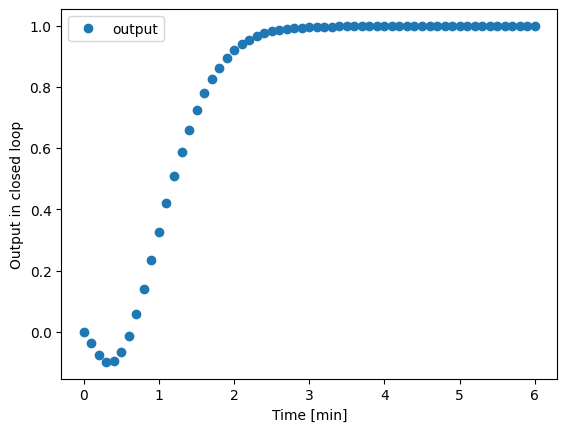

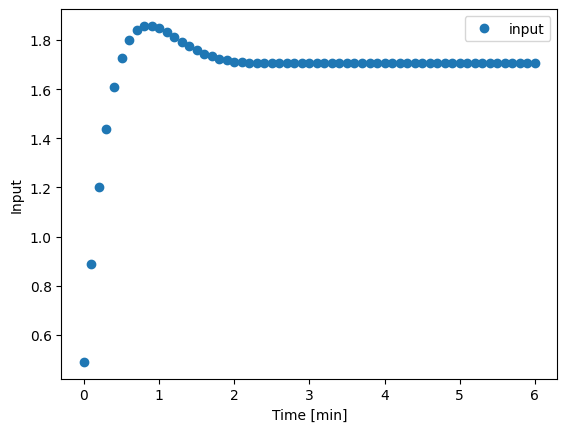

In [217]:
for k in range (0,round(Ns),1):
  delta_u_past=u_past[0:N-2] - u_past[1:N-1]

  u_past_flip = np.flip(u_past)

  u_p = u_past_flip[0:P]

  E=(r.T -(multi_dot([Spast, delta_u_past]) + Sn*u_p + d_hat[:,k])).T

  delta_u_f0= np.zeros((M,1))

  #delta_u_f= multi_dot([inv(multi_dot([Sf.T,Sf]) + W),Sf.T,E])
  delta_uf_final= minimize(f_object,delta_u_f0, method='SLSQP')
  delta_u_f = delta_uf_final.x

  if (k>0):
    u[0,k]=delta_u_f[0]+u[0,k-1]
    u[0,k+1] = u[0,k]
  else:
    u[0,k] = delta_u_f[0]

  x[:,k+1] = np.dot(Phi,x[:,k]) + np.dot(Gamma,u[:,k])

  y[:,k+1] = np.dot(C,x[:,k+1])+np.dot(D,u[:,k+1])

  y_hat[:,k+1] = np.dot(Sf[0,:],delta_u_f) + np.dot(Spast[0,:], delta_u_past) + Sn*u_p[0]

  d_hat[:,k+1]=np.dot(np.ones((P,1)), y[:,k+1] - y_hat[:,k+1])

  d_hat[:,k+1] = np.dot(np.ones((P,1)), y[:,k+1] - y_hat[:,k+1])

  u_past = np.hstack((u[0,k],u_past[0:N-2]))

  error[:,k+1] = r[1,0] - y[0,k+1]



SSE = np.sum(np.square(error))

plt.figure()
plt.plot(t, y[0], 'o', label = 'output')
plt.xlabel('Time [min]')
plt.ylabel('Output in closed loop')
plt.legend()

plt.figure()
plt.plot(t, u[0], 'o', label = 'input')
plt.xlabel('Time [min]')
plt.ylabel('Input')
plt.legend()
